In [2]:
import pandas as pd
from settings import *
from scrape import *
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from ipywidgets import interact
import ipywidgets as widgets
%matplotlib inline

In [2]:
#scrapePage(anacUrl)

In [3]:
situacaoVoos = []
fileCsvFinal = pd.DataFrame()
for ano in range(2015, 2020):
    print(f"Lendo os arquivos do ano {ano}")
    for i in range(1, 13):
            sep = [';', ',','\t']
            sepIndex = 0
            while True:
                try:
                    fileCsv = pd.read_csv(
                        f'data/{ano}-{i:02}.csv', encoding='ISO-8859-1', sep=sep[sepIndex], low_memory=False)
                    if ('internet' in fileCsv.columns[0]):
                        fileCsv.columns = fileCsv.iloc[0]
                        fileCsv = fileCsv[1:]
                    if len(fileCsv.columns) <= 1:
                        raise ValueError('sepIndex')
                    else:
                        try:
                            fileCsv = fileCsv.drop(columns='Data Prevista')
                        except:
                            pass
                        fileCsv.columns = ['ICAO Empresa Aérea', 'Número Voo', 'Código DI', 'Código Tipo Linha',
                                        'ICAO Aeródromo Origem', 'ICAO Aeródromo Destino', 'Partida Prevista',
                                        'Partida Real', 'Chegada Prevista', 'Chegada Real', 'Situação Voo',
                                        'Código Justificativa']
                    
                    fileCsv = fileCsv.assign(Ano = ano)
                    fileCsv = fileCsv.assign(Mes = i)
                    
                    fileCsvFinal = pd.concat([fileCsvFinal, fileCsv])
                    print(len(fileCsvFinal))
                    break
                except Exception as e:
                    if e.args[0] == 'sepIndex':
                        if (sepIndex < 3):
                            sepIndex += 1
                    else:
                        print(e)
fileCsvFinal['Situação Voo'] = fileCsvFinal['Situação Voo'].str.upper()
fileCsvFinal['Situação Voo'] = fileCsvFinal['Situação Voo'].str.replace('NÃO REALIZADO', 'CANCELADO', regex=False)

In [3]:
fileCsvFinal = pd.read_csv('csvFinal.csv')

/home/gabriel/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


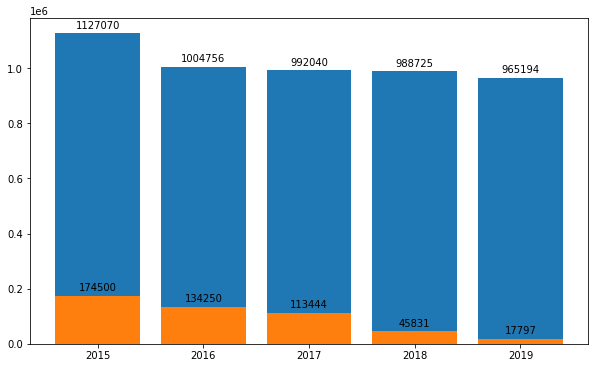

In [5]:

fig, ax = plt.subplots(figsize=(10,6))
SituacaoPorAno = pd.DataFrame()
for situacao in fileCsvFinal['Situação Voo'].unique():
    df = fileCsvFinal.loc[fileCsvFinal['Situação Voo'] == situacao]
    df = df['Ano'].value_counts()
    SituacaoPorAno= pd.concat([SituacaoPorAno, df], axis=1)
SituacaoPorAno.columns = ['Realizado', 'Cancelado']
graphRealizados = plt.bar(SituacaoPorAno['Realizado'].index, SituacaoPorAno['Realizado'].values)
graphCancelados = plt.bar(SituacaoPorAno['Cancelado'].index, SituacaoPorAno['Cancelado'].values)

def autolabel(graph):
  
    for rect in graph:
        valor = rect.get_height()
        ax.annotate(f'{valor}',
                    xy=(rect.get_x() + rect.get_width() / 2, valor),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(graphRealizados)
autolabel(graphCancelados)

Realizados : 5077785
Cancelados : 485822


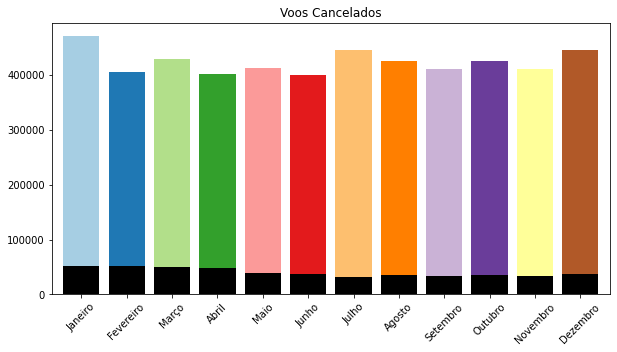

In [78]:
fig, axs = plt.subplots(figsize=(10, 5))
SituacaoPorMes = pd.DataFrame()
colors = ['#ff0000','#ffda00','#e76ec6','#03da00','#000','#e7bec6','#004000','#9abec6','#5b196e','#03da00','#03da00','#03da00']
color=plt.cm.Paired(np.arange(12))
# print(color)
for mes in range(1, 13):
    df = fileCsvFinal.loc[fileCsvFinal['Mes'] == mes]
    df = df['Situação Voo'].value_counts()
    SituacaoPorMes= pd.concat([SituacaoPorMes, df], axis=1)
SituacaoPorMes.columns = ['Janeiro','Fevereiro','Março','Abril','Maio', 'Junho','Julho', 'Agosto','Setembro','Outubro', 'Novembro', 'Dezembro']
SituacaoPorMes.iloc[0].plot(kind='bar', ax=axs, width=0.8, title="Voos Realizados", color=color)
SituacaoPorMes.iloc[1].plot(kind='bar', ax=axs, width=0.8, title="Voos Cancelados", color="#000")
    
labels = axs.get_xticklabels()
for label in labels:
    label.set_rotation(45)
print(f"Realizados : {int(SituacaoPorMes.iloc[0].sum())}")
print(f"Cancelados : {int(SituacaoPorMes.iloc[1].sum())}")

In [68]:
colorPastel = plt.cm.Pastel1(np.arange(12))
# colorBlack
def f(ano):
    fig, axs = plt.subplots(nrows=1, figsize=(10, 5))
    df = fileCsvFinal.loc[fileCsvFinal['Ano'] == ano]
    SituacaoPorMes = pd.DataFrame()
    for mes in range(1, 13):
        df2 = df.loc[df['Mes'] == mes]
        df2 = df2['Situação Voo'].value_counts()
        SituacaoPorMes= pd.concat([SituacaoPorMes, df2], axis=1)
    SituacaoPorMes.columns = ['Janeiro','Fevereiro','Março','Abril','Maio', 'Junho','Julho', 'Agosto','Setembro','Outubro', 'Novembro', 'Dezembro']
    SituacaoPorMes.iloc[0].plot(kind='bar', ax=axs, width=0.8, title="Voos Realizados/Cancelados", color=color)
    SituacaoPorMes.iloc[1].plot(kind='bar', ax=axs, width=0.8, color='#000')
        
    labels = axs.get_xticklabels()
    for label in labels:
        label.set_rotation(45)
    print(f"Média de voos realizados : {np.around(int(SituacaoPorMes.iloc[0].mean()))}")
    print(f"Média de voos cancelados : {np.around(int(SituacaoPorMes.iloc[1].mean()))}")
#     plt.ylabel('Quantidade de voos por mês')

interact(f, ano=widgets.IntSlider(min=2015,max=2019,step=1,value=2015))

interactive(children=(IntSlider(value=2015, description='ano', max=2019, min=2015), Output()), _dom_classes=('…

<function __main__.f(ano)>

## Empresas com maior número de voos realizados e cancelados

In [72]:
explode = (0.05, 0, 0, 0, 0)
def f(ano):
    fig = plt.figure(figsize=(8,8))
    voosRealizados = fileCsvFinal[fileCsvFinal['Situação Voo'] == 'REALIZADO']
    voosRealizados = voosRealizados[voosRealizados['Ano'] == ano]['ICAO Empresa Aérea'].value_counts()
    outrasEmpresas = voosRealizados[voosRealizados < voosRealizados[4]]
    outrasEmpresasRealizadosDf = pd.Series({'Outros' : outrasEmpresas.sum()})
    voosRealizadosDF = pd.concat([voosRealizados[:4], outrasEmpresasRealizadosDf])

    voosCancelados = fileCsvFinal[fileCsvFinal['Situação Voo'] == 'CANCELADO']
    voosCancelados = voosCancelados[voosCancelados['Ano'] == ano]['ICAO Empresa Aérea'].value_counts()
    outrasEmpresasCancelados = voosCancelados[voosCancelados < voosCancelados[4]]
    outrasEmpresasCanceladosDf = pd.Series({'Outros' : outrasEmpresasCancelados.sum()})
    voosCanceladosDF = pd.concat([voosCancelados[:4], outrasEmpresasCanceladosDf])
    
    
    ax1 = plt.subplot2grid((1,2),(0,0))
    ax1.set_title("Realizados")
    plt.pie(voosRealizadosDF, autopct='%1.1f%%', explode=explode, shadow=True, labels=voosRealizadosDF.index)
    
    ax2 = plt.subplot2grid((1,2),(0,1))
    ax2.set_title("Cancelados")
    plt.pie(voosCanceladosDF, autopct='%1.1f%%', explode=explode, shadow=True, labels=voosCanceladosDF.index)
interact(f, ano=widgets.IntSlider(min=2015,max=2019,step=1,value=2015))

interactive(children=(IntSlider(value=2015, description='ano', max=2019, min=2015), Output()), _dom_classes=('…

<function __main__.f(ano)>

9


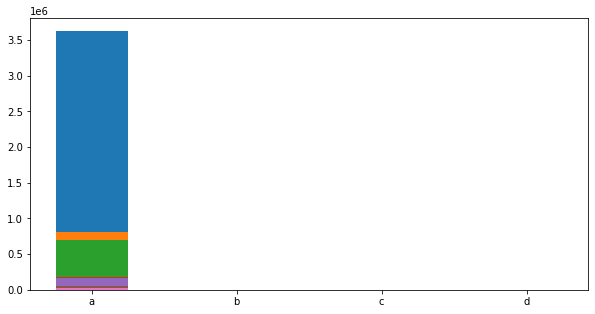

In [176]:
fig = plt.subplots(figsize=(10,5))
linhas = fileCsvFinal['Código Tipo Linha'].value_counts()
print(len(fileCsvFinal['Código Tipo Linha'].unique()))
for i in range(len(fileCsvFinal['Código Tipo Linha'].unique())):
    plt.bar(['a','b','c','d'],[linhas[i], 0, 0, 0], width=0.5)

array([3627689,  812329,  696879,  184604,  163808,   54659,   22131,
           897,     611])

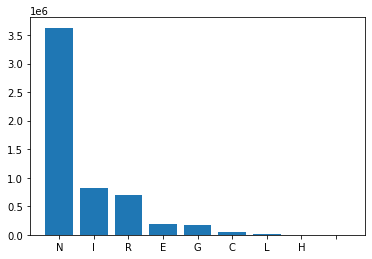

In [181]:
plt.bar(linhas.index, linhas.values)
linhas.values

<BarContainer object of 7 artists>

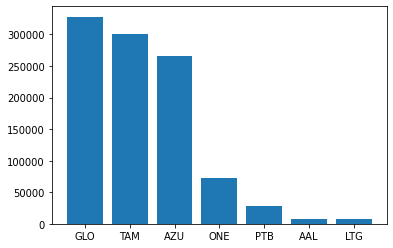

In [185]:
teste = fileCsvFinal[fileCsvFinal['Situação Voo'] == 'REALIZADO']
x = teste[teste['Partida Prevista'] < teste['Partida Real']]
# x['ICAO Empresa Aérea'].value_counts()[:7].plot(kind='bar')
plt.bar(x['ICAO Empresa Aérea'].value_counts()[:7].index, x['ICAO Empresa Aérea'].value_counts()[:7].values)